# 1. Import Libraries

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score


# 2. Load Data 

In [39]:
df = pd.read_csv("processed_data.csv")

In [40]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0,125,212,0,1.0,168,0,1.0,2,2,3,0
1,53.0,1.0,0,140,203,1,0.0,155,1,3.1,0,0,3,0
2,70.0,1.0,0,145,174,0,1.0,125,1,2.6,0,0,3,0
3,61.0,1.0,0,148,203,0,1.0,161,0,0.0,2,1,3,0
4,62.0,0.0,0,138,294,1,1.0,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1,140,221,0,1.0,164,1,0.0,2,0,2,1
1021,56.0,1.0,0,125,258,0,0.0,141,1,2.8,1,1,3,0
1022,47.0,1.0,0,110,275,0,0.0,118,1,1.0,1,1,2,0
1023,50.0,0.0,0,110,254,0,0.0,159,0,0.0,2,0,2,1


# 3. Logistic Regression (Classification Task) 

## 3.1 Define Variables

In [41]:
# X--> Features   Y-->Target
X = df.drop(columns='target', axis=1)
Y = df['target']

#----------------Splitting Data---------------
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42)

#-----------------Scaling---------------------
# Initialize scaler
scaler = StandardScaler()
# Fit on training data only
X_train = scaler.fit_transform(X_train)
# Transform test data
X_test = scaler.transform(X_test)

## 3.2 Train Logistic Regression Model

In [42]:
# Initialize Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Fit on training data
logreg.fit(X_train, Y_train)  # Use scaled data

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

## 3.3 Evaluate Model

In [43]:
# Predict on test set
y_pred = logreg.predict(X_test) #200

# Evaluation
print("Logistic Regression Accuracy: ", accuracy_score(Y_test, y_pred),"\n")
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

Logistic Regression Accuracy:  0.8048780487804879 

Confusion Matrix:
 [[70 30]
 [10 95]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78       100
           1       0.76      0.90      0.83       105

    accuracy                           0.80       205
   macro avg       0.82      0.80      0.80       205
weighted avg       0.82      0.80      0.80       205



## 3.4 Decision Tree

In [44]:
# Initialize Decision Tree
dtc = DecisionTreeClassifier(random_state=42, max_depth=5)  

# Fit on training data
dtc.fit(X_train, Y_train) 

# Predict on test set
y_pred_dtc = dtc.predict(X_test) 

# Evaluation
print("Decision Tree Accuracy: ", accuracy_score(Y_test, y_pred_dtc),"\n")
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_dtc))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_dtc))

Decision Tree Accuracy:  0.8878048780487805 

Confusion Matrix:
 [[89 11]
 [12 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       100
           1       0.89      0.89      0.89       105

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



## 3.5 Prediction Function

##### This Function allows us to predict heart disease for new input data

Accuracy: 0.9707317073170731

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       100
           1       0.98      0.96      0.97       105

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



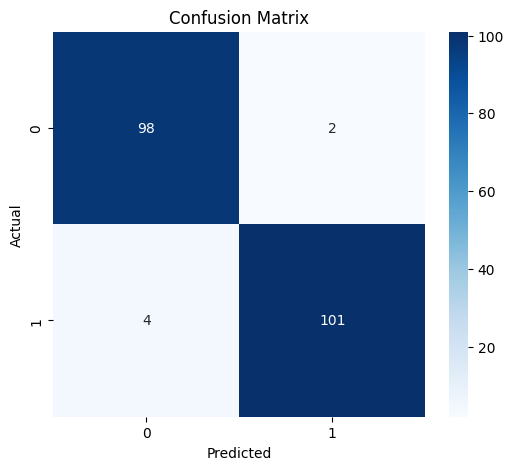

In [45]:
# ---------------- Model Training ----------------
gbc = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gbc.fit(X_train, Y_train)

# ---------------- Prediction ----------------
y_pred = gbc.predict(X_test)

# ---------------- Evaluation ----------------
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(Y_test, y_pred))

# ---------------- Confusion Matrix ----------------
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 4. Linear Regression

## 4.1 Train Model

In [46]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

# Predictions
Y_pred_lr = lr.predict(X_test) 

## 4.2 Evaluate Model 

In [47]:
mse = mean_squared_error(Y_test, Y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred_lr)

print("Mean Squared Error (MSE): ", mse,"\n")
print("Root Mean Squared Error (RMSE): ", rmse,"\n")
print("R2 Score: ", r2)

Mean Squared Error (MSE):  0.12429807737896237 

Root Mean Squared Error (RMSE):  0.35255932462347717 

R2 Score:  0.5025117426808672
